## TF-DNNRegressor - SeLU - Spitzer Calibration Data

This script show a simple example of using [tf.contrib.learn][1] library to create our model.

The code is divided in following steps:

 - Load CSVs data
 - Filtering Categorical and Continuous features
 - Converting Data into Tensors
 - Selecting and Engineering Features for the Model
 - Defining The Regression Model
 - Training and Evaluating Our Model
 - Predicting output for test data

*v0.1: Added code for data loading, modeling and  prediction model.*

*v0.2: Removed unnecessary output logs.*

*PS: I was able to get a score of 1295.07972 using this script with 70% (of train.csv) data used for training and rest for evaluation. Script took 2hrs for training and 3000 steps were used.*

[1]: https://www.tensorflow.org/versions/r0.11/tutorials/tflearn/index.html#tf-contrib-learn-quickstart

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale

from sklearn.metrics import r2_score

from time import time
start0 = time()
plt.rcParams['figure.dpi'] = 300

/Users/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load CSVs data

In [2]:
nSkip = 20
spitzerDataRaw  = pd.read_csv('pmap_ch2_0p1s_x4_rmulti_s3_7.csv')#[::nSkip]

In [3]:
PLDpixels = pd.DataFrame({key:spitzerDataRaw[key] for key in spitzerDataRaw.columns.values if 'pix' in key})
PLDpixels

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9
0,577.447021,3465.876709,1118.598145,550.165466,2460.376953,994.374207,141.741592,521.385254,694.330688
1,569.863098,3387.739258,1087.530762,556.717407,2552.070557,1021.892700,134.061081,511.347778,666.346069
2,552.641235,3405.411377,1082.131104,558.981445,2560.040771,1058.485352,146.488220,513.809570,691.019653
3,571.821167,3340.533691,1073.962036,568.324768,2643.155273,1024.431641,147.687546,525.451538,727.683472
4,538.292114,3248.569336,1021.301208,548.598145,2691.563965,1066.199707,154.170990,541.407532,718.537537
5,553.332214,3183.050293,1026.863281,578.003784,2679.043457,1085.607422,154.789886,517.848328,722.456909
6,541.202332,3137.938232,1035.948364,589.566528,2743.923584,1072.393555,158.401291,539.485718,724.184937
7,547.699829,3057.428467,1034.417603,590.498108,2818.238770,1118.098633,167.132004,540.160950,760.767334
8,534.724976,3015.335205,1007.406494,574.792358,2876.417236,1141.010498,158.403992,527.611633,765.304077
9,529.423950,3010.478027,973.444946,578.736755,2875.608887,1106.352905,163.936325,540.751587,746.721191


In [4]:
PLDnorm = np.sum(np.array(PLDpixels),axis=1)

In [5]:
PLDpixels = (PLDpixels.T / PLDnorm).T
PLDpixels

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9
0,0.054868,0.329321,0.106287,0.052276,0.233781,0.094484,0.013468,0.049541,0.065974
1,0.054337,0.323024,0.103697,0.053084,0.243342,0.097438,0.012783,0.048758,0.063537
2,0.052289,0.322207,0.102387,0.052889,0.242221,0.100150,0.013860,0.048615,0.065382
3,0.053828,0.314461,0.101097,0.053499,0.248813,0.096435,0.013903,0.049463,0.068500
4,0.051126,0.308546,0.097002,0.052105,0.255642,0.101267,0.014643,0.051422,0.068246
5,0.052693,0.303119,0.097787,0.055043,0.255123,0.103381,0.014740,0.049314,0.068799
6,0.051333,0.297631,0.098259,0.055920,0.260259,0.101716,0.015024,0.051170,0.068688
7,0.051502,0.287502,0.097271,0.055527,0.265011,0.105139,0.015716,0.050794,0.071538
8,0.050441,0.284439,0.095029,0.054221,0.271334,0.107632,0.014942,0.049770,0.072192
9,0.050299,0.286019,0.092485,0.054984,0.273205,0.105112,0.015575,0.051376,0.070944


In [6]:
spitzerData = spitzerDataRaw.copy()
for key in spitzerDataRaw.columns: 
    if key in PLDpixels.columns:
        spitzerData[key] = PLDpixels[key]

In [7]:
testPLD = np.array(pd.DataFrame({key:spitzerData[key] for key in spitzerData.columns.values if 'pix' in key}))
assert(not sum(abs(testPLD - np.array(PLDpixels))).all())
print('Confirmed that PLD Pixels have been Normalized to Spec')

Confirmed that PLD Pixels have been Normalized to Spec


In [8]:
notFeatures     = ['flux', 'fluxerr', 'xerr', 'yerr', 'xycov']
feature_columns = spitzerData.drop(notFeatures,axis=1).columns.values
features        = spitzerData.drop(notFeatures,axis=1).values
labels          = spitzerData['flux'].values

In [9]:
stdScaler = StandardScaler()

In [10]:
features_scaled = stdScaler.fit_transform(features)
labels_scaled   = stdScaler.fit_transform(labels[:,None]).ravel()

x_valtest, x_train, y_valtest, y_train = train_test_split(features_scaled, labels_scaled, test_size=0.6, random_state=42)
x_val, x_test, y_val, y_test           = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=42)

# x_val   = minmax_scale(x_val.astype('float32'))
# x_train = minmax_scale(x_train.astype('float32'))
# x_test  = minmax_scale(x_test.astype('float32'))

# y_val   = minmax_scale(y_val.astype('float32'))
# y_train = minmax_scale(y_train.astype('float32'))
# y_test  = minmax_scale(y_test.astype('float32'))

print(x_val.shape[0]  , 'validation samples')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0] , 'test samples')

157057 validation samples
471171 train samples
157057 test samples


In [11]:
train_df    = pd.DataFrame(np.c_[x_train, y_train], columns=list(feature_columns) + ['flux'])
test_df     = pd.DataFrame(np.c_[x_test , y_test ], columns=list(feature_columns) + ['flux'])
evaluate_df = pd.DataFrame(np.c_[x_val  , y_val  ], columns=list(feature_columns) + ['flux'])

We only take first 1000 rows for training/testing and last 500 row for evaluation.


This done so that this script does not consume a lot of kaggle system resources.

In [12]:
# train_df = df_train_ori.head(1000)
# evaluate_df = df_train_ori.tail(500)

# test_df = df_test_ori.head(1000)

# MODEL_DIR = "tf_model_spitzer/withNormalization_drop50/relu"
# MODEL_DIR = "tf_model_spitzer/adamOptimizer_with_drop50/relu"
MODEL_DIR = "tf_model_spitzer/adamOptimizer_with_drop50/selu/"

print("train_df.shape = "   , train_df.shape)
print("test_df.shape = "    , test_df.shape)
print("evaluate_df.shape = ", evaluate_df.shape)

train_df.shape =  (471171, 20)
test_df.shape =  (157057, 20)
evaluate_df.shape =  (157057, 20)


## Filtering Categorical and Continuous features

We store Categorical, Continuous and Target features names in different variables. This will be helpful in later steps.

In [13]:
# categorical_features = [feature for feature in features if 'cat' in feature]
categorical_features  = []
continuous_features   = [feature for feature in train_df.columns]# if 'cat' in feature]
LABEL_COLUMN          = 'flux'

## Converting Data into Tensors

> When building a TF.Learn model, the input data is specified by means of an Input Builder function. This builder function will not be called until it is later passed to TF.Learn methods such as fit and evaluate. The purpose of this function is to construct the input data, which is represented in the form of Tensors or SparseTensors.

> Note that input_fn will be called while constructing the TensorFlow graph, not while running the graph. What it is returning is a representation of the input data as the fundamental unit of TensorFlow computations, a Tensor (or SparseTensor).

[More detail][2] on input_fn.

[2]: https://www.tensorflow.org/versions/r0.11/tutorials/input_fn/index.html#building-input-functions-with-tf-contrib-learn

In [14]:
# Converting Data into Tensors
def input_fn(df, training = True):
    # Creates a dictionary mapping from each continuous feature column name (k) to
    # the values of that column stored in a constant Tensor.
    continuous_cols = {k: tf.constant(df[k].values)
                       for k in continuous_features}

    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    # categorical_cols = {k: tf.SparseTensor(
    #     indices=[[i, 0] for i in range(df[k].size)],
    #     values=df[k].values,
    #     shape=[df[k].size, 1])
    #     for k in categorical_features}

    # Merges the two dictionaries into one.
    feature_cols = continuous_cols
    # feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training:
        # Converts the label column into a constant Tensor.
        label = tf.constant(df[LABEL_COLUMN].values)

        # Returns the feature columns and the label.
        return feature_cols, label
    
    # Returns the feature columns    
    return feature_cols

def train_input_fn():
    return input_fn(train_df, training=True)

def eval_input_fn():
    return input_fn(evaluate_df, training=True)

# def test_input_fn():
#     return input_fn(test_df.drop(LABEL_COLUMN,axis=1), training=False)

def test_input_fn():
    return input_fn(test_df, training=False)

## Selecting and Engineering Features for the Model

We use tf.learn's concept of [FeatureColumn][FeatureColumn] which help in transforming raw data into suitable input features. 

These engineered features will be used when we construct our model.

[FeatureColumn]: https://www.tensorflow.org/versions/r0.11/tutorials/linear/overview.html#feature-columns-and-transformations

In [15]:
engineered_features = []

for continuous_feature in continuous_features:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))


# for categorical_feature in categorical_features:
#     sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
#         categorical_feature, hash_bucket_size=1000)

#     engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16,
#                                                                   combiner="sum"))

## Defining The Regression Model

Following is the simple DNNRegressor model. More detail about hidden_units, etc can be found [here][123].

**model_dir** is used to save and restore our model. This is because once we have trained the model we don't want to train it again, if we only want to predict on new data-set.

[123]: https://www.tensorflow.org/versions/r0.9/api_docs/python/contrib.learn.html#DNNRegressor

In [16]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [17]:
nHidden1  = 10
nHidden2  = 5
nHidden3  = 10

regressor = tf.contrib.learn.DNNRegressor(activation_fn=selu, dropout=0.5, optimizer=tf.train.AdamOptimizer,
    feature_columns=engineered_features, hidden_units=[nHidden1, nHidden2, nHidden3], model_dir=MODEL_DIR)

## Training and Evaluating Our Model

add progress bar through python `logging`

In [ ]:
# Training Our Model
nFitSteps = 50000
start = time()
wrap  = regressor.fit(input_fn=train_input_fn, steps=nFitSteps)
print('TF Regressor took {} seconds'.format(time()-start))

In [ ]:
# Evaluating Our Model
print('Evaluating ...')
results = regressor.evaluate(input_fn=eval_input_fn, steps=1)

for key in sorted(results):
    print("{}: {}".format(key, results[key]))

print("Val Acc: {:.3f}".format((1-results['loss'])*100))

**Track Scalable Growth**

Shrunk data set to 23559 Training samples and 7853 Val/Test samples

| n_iters | time (s) | val acc | multicore | gpu |
|------------------------------------------------|
|  100    |   5.869  |  6.332 | yes | no |
|  200    |   6.380  | 13.178 | yes | no |
|  500    |   8.656  | 54.220 | yes | no |
|  1000   |  12.170  | 66.596 | yes | no |
|  2000   |  19.891  | 62.996 | yes | no |
|  5000   |  43.589  | 76.586 | yes | no |
|  10000  |  80.581  | 66.872 | yes | no |
|  20000  | 162.435  | 78.927 | yes | no |
|  50000  | 535.584  | 75.493 | yes | no |
|  100000 | 1062.656 | 73.162 | yes | no |

In [20]:
nItersList = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
rtimesList = [5.869, 6.380, 8.656, 12.170, 19.891, 43.589, 80.581, 162.435, 535.584, 1062.656]
valAccList = [6.332, 13.178, 54.220, 66.596, 62.996, 76.586, 66.872, 78.927, 75.493, 73.162]

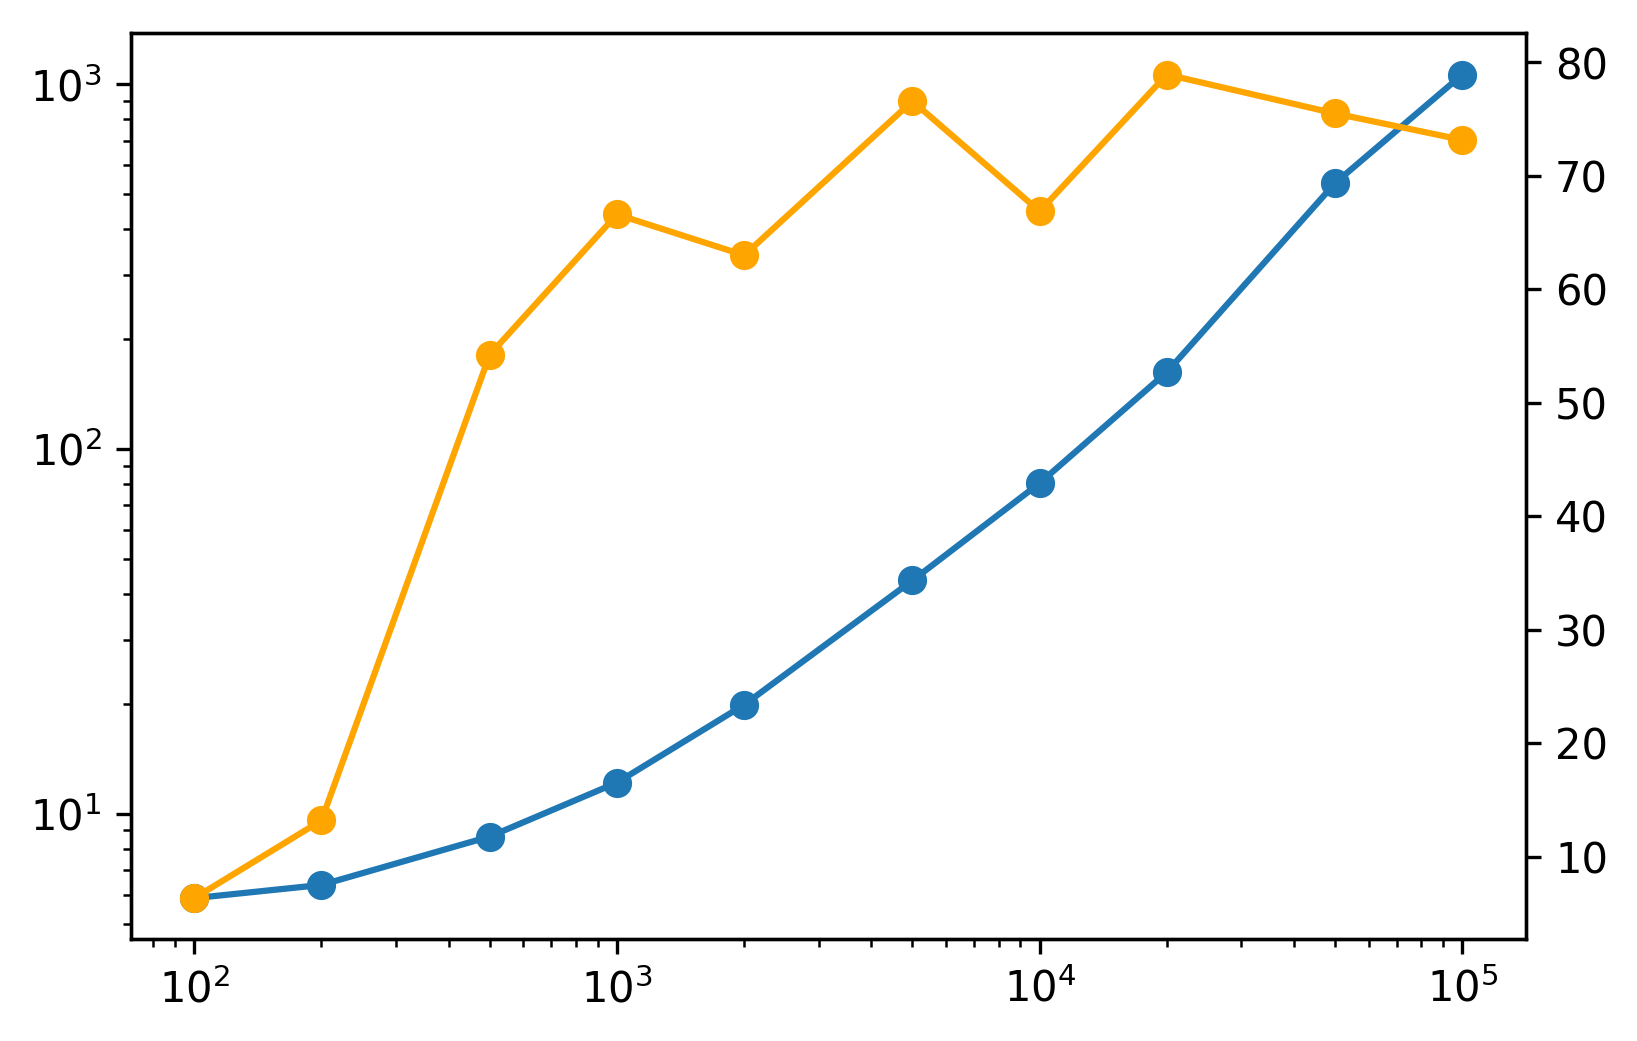

In [21]:
plt.loglog(nItersList, rtimesList,'o-');
plt.twinx()
plt.semilogx(nItersList, valAccList,'o-', color='orange');

## Predicting output for test data

Most of the time prediction script would be separate from training script (we need not to train on same data again) but I am providing both in same script here; as I am not sure if we can create multiple notebook and somehow share data between them in Kaggle.

In [22]:
def de_median(x):
    return x - np.median(x)

In [23]:
predicted_output = list(regressor.predict(input_fn=test_input_fn))
# x = list(predicted_output)

In [24]:
r2_score(test_df['flux'].values,predicted_output)*100

93.993887355715046

In [25]:
print('Full notebook took {} seconds'.format(time()-start0))

Full notebook took 3655.5832710266113 seconds
